In [9]:
import pandas as pd
import datetime
import poloniex
from datetime import time
import time
from matplotlib import pylab as plt
import seaborn as sns
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 15, 6 
from scipy import stats
import statsmodels.api as sm
import numpy as np
from statsmodels.tsa.api import VAR, DynamicVAR
import scipy.stats as zscore
rcParams['figure.figsize'] = 15, 6
#data=pd.read_csv("del-duplicate-newdata")
#data=pd.read_csv('w2v-svm-PN-jyuuhuku.csv')
data=pd.read_csv('w2v-svm-PN-jyuuhuku-sin.csv')

,Unnamed: 0,day,PN
0,0,2016-01-01,2.000000
1,1,2016-01-02,2.051282
2,2,2016-01-03,2.021505
3,3,2016-01-04,1.982759
4,4,2016-01-05,1.963964
5,5,2016-01-06,2.047945
6,6,2016-01-07,2.126126
7,7,2016-01-08,1.948718
8,8,2016-01-09,1.942029
9,9,2016-01-10,1.892308


In [10]:
#data=data.drop('Unnamed: 0',axis=1)
data.index=pd.to_datetime(data['date'])
data.plot()

KeyError: 'date'

In [7]:
data=data.drop('RT',axis=1)
data=data.drop('Favo',axis=1)
data=data.drop('date',axis=1)
data=data.drop('text',axis=1)

In [4]:
data=data[data.index!='2018-06-01']

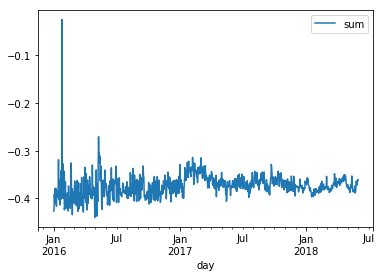

In [4]:
data.plot()

In [5]:
data[data.loc[:,'sum']>-0.2]

,day,sum
day,,
2016-01-25,2016-01-25,-0.024638


In [6]:
data=data.drop('day',axis=1)
data1=pd.read_csv('bit-kyokusei-re.csv')
data1=data1.drop('sum',axis=1)
#data

In [8]:
#data['2016-06-25']=(data['2016-06-26']+data['2018-06-24'])/2.0
#data1=data1.drop('sum',axis=1)

In [7]:
data1.index=pd.to_datetime(data1['Unnamed: 0'])

In [8]:
df=pd.concat([data,data1],axis=1)

In [9]:
#df=df.drop('day',axis=1)
data1=data1.drop('Unnamed: 0',axis=1)

In [10]:
df=df.dropna()

In [11]:
df=df.drop('Unnamed: 0',axis=1)

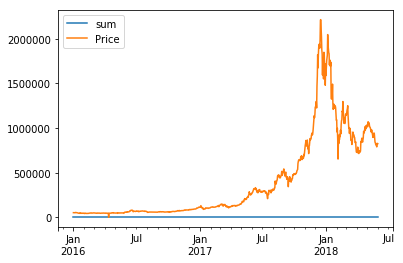

In [12]:
df.plot()

In [13]:
#df.to_csv('重複データ削除済み一般極性辞書による極性値と価格データ')
#df=pd.read_csv('重複データ削除済み一般極性辞書による極性値と価格データ')
import scipy.stats as zscore

In [16]:
#df=df.drop('Unnamed: 0',axis=1)

In [17]:
df[df.loc[:,'sum']>-0.1]

,sum,Price
2016-01-25,-0.024638,44882.0


In [14]:
df.loc['2016-01-25','sum']=(df.loc['2016-01-24','sum']+df.loc['2016-01-26','sum'])/2.0

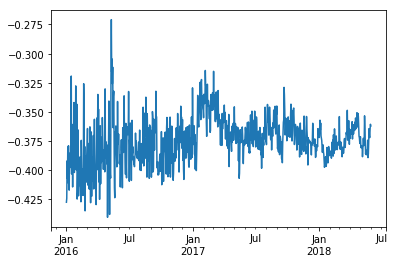

In [15]:
df['sum'].plot()

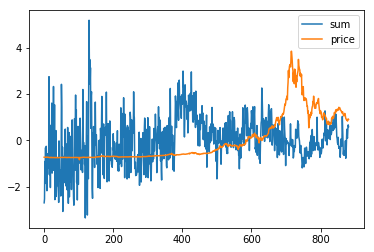

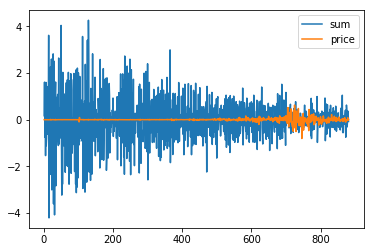

In [20]:
b=zscore.zscore(df,axis=0)
b=pd.DataFrame(data=b,  columns=['sum','price',], dtype='float')
b.plot()
ad = b - b.shift(1)
ad.plot()
ad=ad.dropna()

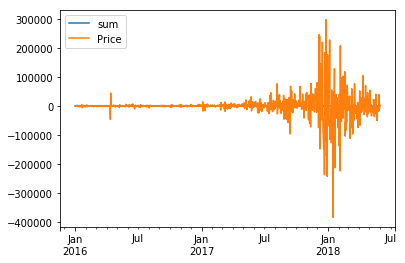

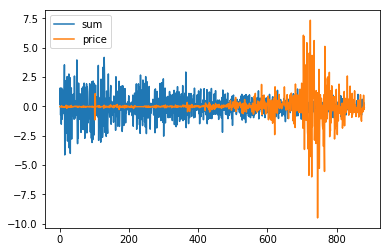

In [21]:
ac=df-df.shift(1)
ac.plot()
ac=ac.dropna()
b=zscore.zscore(ac,axis=0)
b=pd.DataFrame(data=b,  columns=['sum','price',], dtype='float')
b.plot()

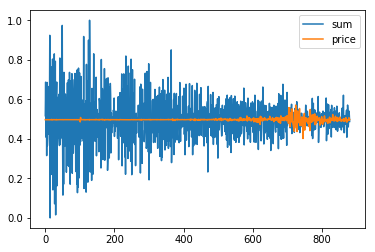

In [22]:
def min_max_normalization(x):
    x_min = x.min()
    x_max = x.max()
    x_mean = x.mean()
    x_norm = (x - x_min) / ( x_max - x_min)
    return x_norm
l=ad.values
l2=l-l.mean()
l=l2/l2.std()
l=min_max_normalization(l)
l=pd.DataFrame(data=l,  columns=['sum','price'], dtype='float')
l.plot()

In [23]:
var=[]
for i in range(11):
    #var.append(VAR(l[['price','sum']]).fit(maxlags=i))
    var.append(VAR(l[['favo','tweetnum']]).fit(maxlags=i))
aic=[]
for i in range(11):
    aic.append(var[i].aic)
pd.Series(aic,index=range(11),name='AIC')

KeyError: "['favo' 'tweetnum'] not in index"

In [ ]:
names=['value','price']
#names=['price','value']
stat=[]
pval=[]
null=[]
for h in range(1,10):
    for i in range(2):
        for j in range(2):
            if i!=j:
                test=var[h].test_causality(i,j,kind='f',signif=0.05)
                stat.append(test.test_statistic.round(1))
                pval.append(test.pvalue.round(3))
                null.append('%s->%s'%(names[j],names[i]))
            else:
                pass
    print(str(h)+"  lag")
    print(pd.DataFrame({'Statistics':stat,'P_value':pval},index=null,columns=['Statistics','P_value']).T)
    print("--------------------------------------")
    stat=[]
    pval=[]
    null=[]

In [ ]:
#LSTMによる予測

from keras.models import Sequential  
from keras.layers.core import Dense, Activation  
from keras.layers.recurrent import LSTM
#_loaddata1は二変数用　_loaddataは一変数用

def _load_data1(data, n_prev=3):
    docX, docY = [], []
    for i in range(len(data)-n_prev):
        #print(i)
        docX.append(data.iloc[i:i+n_prev].as_matrix())
        docY.append(data['price'].iloc[i+n_prev])#data['price']
    alsX = np.array(docX)
    alsY = np.array(docY)
    return alsX, alsY

def _load_data(data, n_prev=3):
    docX, docY = [], []
    for i in range(len(data)-n_prev):
        #print(i)
        docX.append(data.iloc[i:i+n_prev].as_matrix())
        docY.append(data.iloc[i+n_prev])#data['price']
    alsX = np.array(docX)
    alsY = np.array(docY)
    return alsX, alsY

def train_test_split(df, test_size=0.2, n_prev=3):
    ntrn = round(len(df) * (1 - test_size))
    ntrn = int(ntrn)
    #print("a")
    X_train, y_train = _load_data1(df.iloc[0:ntrn], n_prev)
    #print("b")
    X_test, y_test = _load_data1(df.iloc[ntrn:], n_prev)
    return (X_train, y_train), (X_test, y_test)

per=[]
pe=0
from keras.callbacks import EarlyStopping

early_stopping = EarlyStopping(monitor='val_loss', mode='auto', patience=0)
for j in range(0,10):
    pe=0
    bitmcp=ad.copy()#bitm.copy()
    bitmcp["sum"]=bitmcp["sum"].shift(j)
    bitmcp=bitmcp.dropna().reset_index(drop=True)
    for i in range(10):
        
        #bitm3=(bitm-bitm.shift(j)).dropna()
        #bitm3=bitm3.reset_index()
        #bitm3=bitm3.drop("index",axis=1)

        (X_train, y_train), (X_test, y_test) = train_test_split(bitmcp)

        out_neurons = 1
        in_neurons=2
        hidden_neurons = 300
        length_of_sequences = 3

        model = Sequential()
        model.add(LSTM(hidden_neurons, batch_input_shape=(None, length_of_sequences, in_neurons), return_sequences=False))
        model.add(Dense(out_neurons))
        model.add(Activation("linear"))
        model.compile(loss="mean_squared_error", optimizer="adam",)
        early_stopping = EarlyStopping(monitor='val_loss', mode='auto', patience=0)
        history = model.fit(X_train, y_train, batch_size=600, epochs=10, validation_split=0.1, callbacks=[early_stopping])
        pred_data = model.predict(X_test)
        plt.plot(y_test, label='train')
        plt.plot(pred_data, label='pred')
        plt.legend(loc='upper left')
        #plt.show()
        predp3=(pred_data>=0).reshape(len(y_test))
        testp3=(y_test>=0).reshape(len(y_test))
        a2=(predp3==testp3)
        if pe<len(a2[a2==True])/len(a2):
            pe=len(a2[a2==True])/len(a2)
    per.append([str(j),pe])

In [ ]:
per

In [16]:
dt=pd.read_csv('new_f-r-n.csv')
dt.index=pd.to_datetime(dt['day'])
dt=dt.drop('day',axis=1)
dt=dt.drop('day.1',axis=1)
df=pd.concat([df,dt],axis=1)
df=df.dropna()

In [18]:
df.to_csv('kakusan-detect-data')

In [19]:
#dt
#ad=df-df.shift(1)

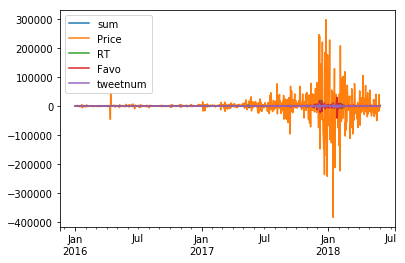

In [21]:
ad=df-df.shift(1)
ad=ad.dropna()
ad.plot()
ad=zscore.zscore(ad,axis=0)
ad=pd.DataFrame(data=ad,  columns=['sum','price','RT','favo','tweetnum'], dtype='float')
ad.plot()

In [22]:
ad=zscore.zscore(ad,axis=0)
#ad.plot()

AttributeError: 'numpy.ndarray' object has no attribute 'plot'

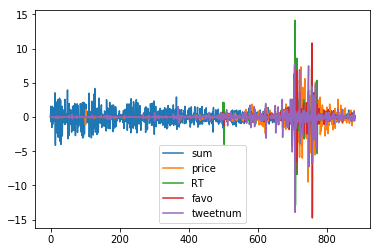

In [24]:
ad=pd.DataFrame(data=ad,  columns=['sum','price','RT','favo','tweetnum'], dtype='float')
ad.plot()

In [29]:
df=pd.concat([df,dt],axis=1)

In [30]:
df=df.dropna()

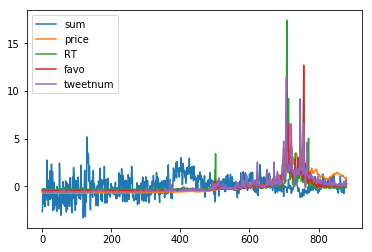

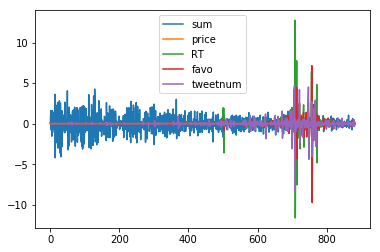

In [31]:
b=zscore.zscore(df,axis=0)
b=pd.DataFrame(data=b,  columns=['sum','price','RT','favo','tweetnum'], dtype='float')
b.plot()
ad = b - b.shift(1)
ad.plot()
ad=ad.dropna()

In [ ]:
def min_max_normalization(x):
    x_min = x.min()
    x_max = x.max()
    x_mean = x.mean()
    x_norm = (x - x_min) / ( x_max - x_min)
    return x_norm
l=ad.values
l2=l-l.mean()
l=l2/l2.std()
l=min_max_normalization(l)
l=pd.DataFrame(data=l,  columns=['sum','price','RT','favo','tweetnum'], dtype='float')
l.plot()

In [ ]:
corr_mat = ad.corr(method='pearson')

In [ ]:
import seaborn as sons
sns.heatmap(corr_mat,
            vmin=-1.0,
            vmax=1.0,
            center=0,
            annot=True, # True:格子の中に値を表示
            fmt='.1f',
            xticklabels=corr_mat.columns.values,
            yticklabels=corr_mat.columns.values
           )
plt.show()

In [ ]:
ad.max()

In [ ]:
#LSTMによる予測

from keras.models import Sequential  
from keras.layers.core import Dense, Activation  
from keras.layers.recurrent import LSTM
#_loaddata1は二変数用　_loaddataは一変数用

def _load_data1(data, n_prev=3):
    docX, docY = [], []
    for i in range(len(data)-n_prev):
        #print(i)
        docX.append(data.iloc[i:i+n_prev].as_matrix())
        docY.append(data['price'].iloc[i+n_prev])#data['price']
    alsX = np.array(docX)
    alsY = np.array(docY)
    return alsX, alsY


def train_test_split(df, test_size=0.2, n_prev=3):
    ntrn = round(len(df) * (1 - test_size))
    ntrn = int(ntrn)
    #print("a")
    X_train, y_train = _load_data1(df.iloc[0:ntrn], n_prev)
    #print("b")
    X_test, y_test = _load_data1(df.iloc[ntrn:], n_prev)
    return (X_train, y_train), (X_test, y_test)

per=[]
pe=0
from keras.callbacks import EarlyStopping

early_stopping = EarlyStopping(monitor='val_loss', mode='auto', patience=0)
for j in range(1):#0,10):
    pe=0
    bitmcp=ad.copy()#bitm.copy()
    bitmcp["RT"]=bitmcp["RT"].shift(0)
    bitmcp["favo"]=bitmcp["favo"].shift(2)
    bitmcp["tweetnum"]=bitmcp["tweetnum"].shift(0)
    bitmcp["sum"]=bitmcp["sum"].shift(2)
    bitmcp=bitmcp.dropna().reset_index(drop=True)
    for i in range(3):
        
        #bitm3=(bitm-bitm.shift(j)).dropna()
        #bitm3=bitm3.reset_index()
        #bitm3=bitm3.drop("index",axis=1)

        (X_train, y_train), (X_test, y_test) = train_test_split(bitmcp[['RT','price']])

        out_neurons = 1
        in_neurons=2
        hidden_neurons = 300
        length_of_sequences = 3

        model = Sequential()
        model.add(LSTM(hidden_neurons, batch_input_shape=(None, length_of_sequences, in_neurons), return_sequences=False))
        model.add(Dense(out_neurons))
        model.add(Activation("linear"))
        model.compile(loss="mean_squared_error", optimizer="adam",)
        early_stopping = EarlyStopping(monitor='val_loss', mode='auto', patience=0)
        history = model.fit(X_train, y_train, batch_size=600, epochs=10, validation_split=0.1, callbacks=[early_stopping])
        pred_data = model.predict(X_test)
        plt.plot(y_test, label='train')
        plt.plot(pred_data, label='pred')
        plt.legend(loc='upper left')
        #plt.show()
        predp3=(pred_data>=0).reshape(len(y_test))
        testp3=(y_test>=0).reshape(len(y_test))
        a2=(predp3==testp3)
        if pe<len(a2[a2==True])/len(a2):
            pe=len(a2[a2==True])/len(a2)
    per.append([str(j),pe])

In [ ]:
#bitmcp[['RT','price']]
per

In [ ]:
['0', 0.5606936416184971]
'RT','price','sum','tweetnum'[['0', 0.5491329479768786]]
[['0', 0.5433526011560693]]

In [ ]:
dt=df.copy()
dt=dt-dt.shift(1)

In [ ]:
def min_max_normalization(x):
    x_min = x.min()
    x_max = x.max()
    x_mean = x.mean()
    x_norm = (x - x_min) / ( x_max - x_min)
    return x_norm
l=min_max_normalization(dt)
l=pd.DataFrame(data=l,  columns=['sum','Price','RT','Favo','tweetnum'], dtype='float')
l.plot()

In [ ]:
dt=dt.dropna()

In [ ]:
l=l.dropna()

In [ ]:

var=[]
for i in range(11):
    #var.append(VAR(l[['price','sum']]).fit(maxlags=i))
    var.append(VAR(l[['Price','tweetnum']]).fit(maxlags=i))
aic=[]
for i in range(11):
    aic.append(var[i].aic)
print(pd.Series(aic,index=range(11),name='AIC'))
names=['value','price']
#names=['price','value']
stat=[]
pval=[]
null=[]
for h in range(1,10):
    for i in range(2):
        for j in range(2):
            if i!=j:
                test=var[h].test_causality(i,j,kind='f',signif=0.05)
                stat.append(test.test_statistic.round(1))
                pval.append(test.pvalue)
                null.append('%s->%s'%(names[j],names[i]))
            else:
                pass
    print(str(h)+"  lag")
    print(pd.DataFrame({'Statistics':stat,'P_value':pval},index=null,columns=['Statistics','P_value']).T)
    #print("--------------------------------------")
    stat=[]
    pval=[]
    null=[]

In [ ]:
var=[]
for i in range(11):
    #var.append(VAR(l[['price','sum']]).fit(maxlags=i))
    var.append(VAR(l[['Price','Favo']]).fit(maxlags=i))
aic=[]
for i in range(11):
    aic.append(var[i].aic)
pd.Series(aic,index=range(11),name='AIC')
names=['value','price']
#names=['price','value']
stat=[]
pval=[]
null=[]
for h in range(1,10):
    for i in range(2):
        for j in range(2):
            if i!=j:
                test=var[h].test_causality(i,j,kind='f',signif=0.05)
                stat.append(test.test_statistic.round(1))
                pval.append(test.pvalue.round(3))
                null.append('%s->%s'%(names[j],names[i]))
            else:
                pass
    print(str(h)+"  lag")
    print(pd.DataFrame({'Statistics':stat,'P_value':pval},index=null,columns=['Statistics','P_value']).T)
    print("--------------------------------------")
    stat=[]
    pval=[]
    null=[]

In [ ]:
var=[]
for i in range(11):
    #var.append(VAR(l[['price','sum']]).fit(maxlags=i))
    var.append(VAR(l[['Price','tweetnum']]).fit(maxlags=i))
aic=[]
for i in range(11):
    aic.append(var[i].aic)
pd.Series(aic,index=range(11),name='AIC')
names=['value','price']
#names=['price','value']
stat=[]
pval=[]
null=[]
for h in range(1,10):
    for i in range(2):
        for j in range(2):
            if i!=j:
                test=var[h].test_causality(i,j,kind='f',signif=0.05)
                stat.append(test.test_statistic.round(1))
                pval.append(test.pvalue.round(3))
                null.append('%s->%s'%(names[j],names[i]))
            else:
                pass
    print(str(h)+"  lag")
    print(pd.DataFrame({'Statistics':stat,'P_value':pval},index=null,columns=['Statistics','P_value']).T)
    print("--------------------------------------")
    stat=[]
    pval=[]
    null=[]

In [ ]:
l[['tweetnum','Price']].plot()

In [ ]:
l[l.index.year==2017][['tweetnum','Price','Favo']].plot()

In [ ]:
df

In [ ]:
l=min_max_normalization(df)
l=pd.DataFrame(data=l,  columns=['sum','Price','RT','Favo','tweetnum'], dtype='float')
l.plot()

In [ ]:
var=[]
for i in range(11):
    #var.append(VAR(l[['price','sum']]).fit(maxlags=i))
    var.append(VAR(l[['Price','RT']]).fit(maxlags=i))
aic=[]
for i in range(11):
    aic.append(var[i].aic)
pd.Series(aic,index=range(11),name='AIC')
names=['value','price']
#names=['price','value']
stat=[]
pval=[]
null=[]
for h in range(1,10):
    for i in range(2):
        for j in range(2):
            if i!=j:
                test=var[h].test_causality(i,j,kind='f',signif=0.05)
                stat.append(test.test_statistic.round(1))
                pval.append(test.pvalue.round(5))
                null.append('%s->%s'%(names[j],names[i]))
            else:
                pass
    print(str(h)+"  lag")
    print(pd.DataFrame({'Statistics':stat,'P_value':pval},index=null,columns=['Statistics','P_value']).T)
    print("--------------------------------------")
    stat=[]
    pval=[]
    null=[]

In [5]:
df.index=pd.to_datetime(df['Unnamed: 0'])
df=df.drop('Unnamed: 0',axis=1)
df.head()

,sum,Price,RT,Favo,tweetnum
Unnamed: 0,,,,,
2016-01-01,-0.427337,52048.0,3,11,61
2016-01-02,-0.423968,51802.0,86,232,85
2016-01-03,-0.391909,51489.0,58,78,92
2016-01-04,-0.406785,51392.0,40,92,107
2016-01-05,-0.380087,52249.0,22,71,98


In [1]:
import pandas as pd
import datetime
import poloniex
from datetime import time
import time
from matplotlib import pylab as plt
import seaborn as sns
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 15, 6 
from scipy import stats
import statsmodels.api as sm
import numpy as np
from statsmodels.tsa.api import VAR, DynamicVAR
import scipy.stats as zscore

df=pd.read_csv('kakusan-detect-data')
df.index=pd.to_datetime(df['Unnamed: 0'])
df=df.drop('Unnamed: 0',axis=1)
ad=df-df.shift(1)
ad=ad.dropna()
ad.plot()
ad=zscore.zscore(ad,axis=0)
ad=pd.DataFrame(data=ad,  columns=['sum','price','RT','favo','tweetnum'], dtype='float')
ad.plot()

Using TensorFlow backend.


Train on 630 samples, validate on 70 samples
Epoch 1/10
630/630 [==============================] - 1s 1ms/step - loss: 0.0691 - val_loss: 1.1406
Epoch 2/10
630/630 [==============================] - 0s 199us/step - loss: 0.0685 - val_loss: 1.1460
Train on 630 samples, validate on 70 samples
Epoch 1/10
630/630 [==============================] - 1s 1ms/step - loss: 0.0706 - val_loss: 1.1519
Epoch 2/10
630/630 [==============================] - 0s 210us/step - loss: 0.0698 - val_loss: 1.1420
Epoch 3/10
630/630 [==============================] - 0s 244us/step - loss: 0.0695 - val_loss: 1.1336
Epoch 4/10
630/630 [==============================] - 0s 233us/step - loss: 0.0692 - val_loss: 1.1329
Epoch 5/10
630/630 [==============================] - 0s 240us/step - loss: 0.0688 - val_loss: 1.1315
Epoch 6/10
630/630 [==============================] - 0s 236us/step - loss: 0.0685 - val_loss: 1.1271
Epoch 7/10
630/630 [==============================] - 0s 240us/step - loss: 0.0684 - val_loss: 1.1

627/627 [==============================] - 0s 366us/step - loss: 0.0693 - val_loss: 1.2217
Epoch 5/10
627/627 [==============================] - 0s 274us/step - loss: 0.0692 - val_loss: 1.2264
Train on 627 samples, validate on 70 samples
Epoch 1/10
627/627 [==============================] - 5s 8ms/step - loss: 0.0696 - val_loss: 1.2912
Epoch 2/10
627/627 [==============================] - 0s 247us/step - loss: 0.0694 - val_loss: 1.3088
Train on 626 samples, validate on 70 samples
Epoch 1/10
626/626 [==============================] - 6s 10ms/step - loss: 0.0690 - val_loss: 1.2864
Epoch 2/10
626/626 [==============================] - 0s 283us/step - loss: 0.0691 - val_loss: 1.2976
Train on 626 samples, validate on 70 samples
Epoch 1/10
626/626 [==============================] - 5s 8ms/step - loss: 0.0696 - val_loss: 1.2880
Epoch 2/10
626/626 [==============================] - 0s 229us/step - loss: 0.0692 - val_loss: 1.3010
Train on 626 samples, validate on 70 samples
Epoch 1/10
626/626 [

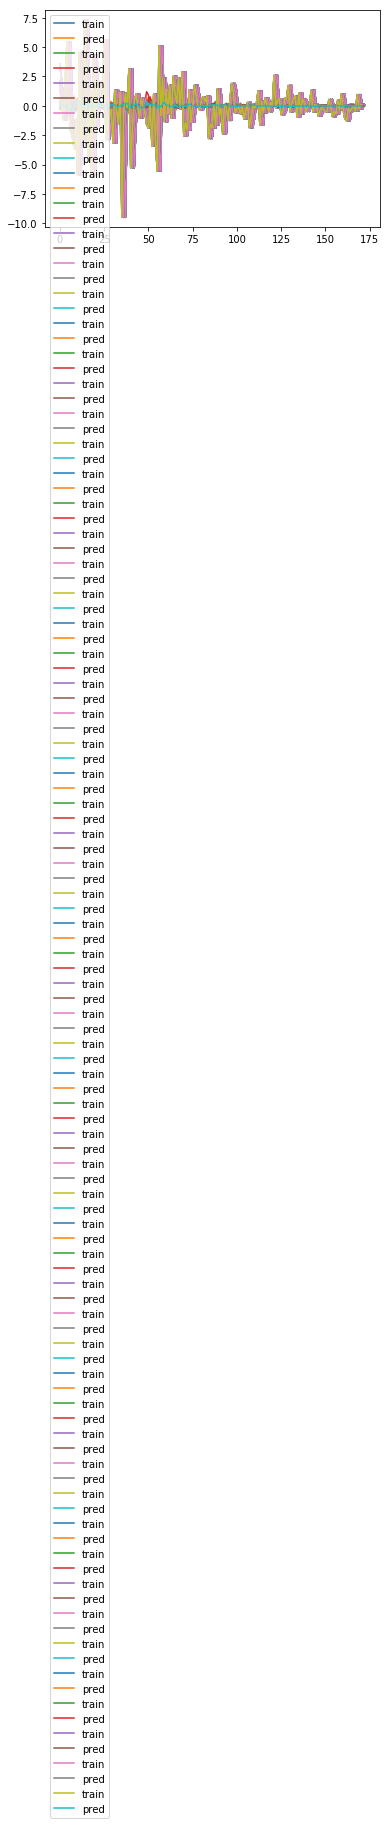

In [2]:
#LSTMによる予測

from keras.models import Sequential  
from keras.layers.core import Dense, Activation  
from keras.layers.recurrent import LSTM
#_loaddata1は二変数用　_loaddataは一変数用

def _load_data1(data, n_prev=3):
    docX, docY = [], []
    for i in range(len(data)-n_prev):
        #print(i)
        docX.append(data.iloc[i:i+n_prev].as_matrix())
        docY.append(data['price'].iloc[i+n_prev])#data['price']
    alsX = np.array(docX)
    alsY = np.array(docY)
    return alsX, alsY


def train_test_split(df, test_size=0.2, n_prev=3):
    ntrn = round(len(df) * (1 - test_size))
    ntrn = int(ntrn)
    #print("a")
    X_train, y_train = _load_data1(df.iloc[0:ntrn], n_prev)
    #print("b")
    X_test, y_test = _load_data1(df.iloc[ntrn:], n_prev)
    return (X_train, y_train), (X_test, y_test)

per=[]
pe=0
from keras.callbacks import EarlyStopping

early_stopping = EarlyStopping(monitor='val_loss', mode='auto', patience=0)
#name=['sum','RT','price',
for j in range(10):#0,10):
    pe=0
    bitmcp=ad.copy()#bitm.copy()
    bitmcp["RT"]=bitmcp["RT"].shift(j)
    bitmcp["favo"]=bitmcp["favo"].shift(j)
    bitmcp["tweetnum"]=bitmcp["tweetnum"].shift(j)
    bitmcp["sum"]=bitmcp["sum"].shift(2)
    bitmcp=bitmcp.dropna().reset_index(drop=True)
    for i in range(6):
        
        #bitm3=(bitm-bitm.shift(j)).dropna()
        #bitm3=bitm3.reset_index()
        #bitm3=bitm3.drop("index",axis=1)

        (X_train, y_train), (X_test, y_test) = train_test_split(bitmcp[['price','favo']])

        out_neurons = 1
        in_neurons=2
        hidden_neurons = 300
        length_of_sequences = 3

        model = Sequential()
        model.add(LSTM(hidden_neurons, batch_input_shape=(None, length_of_sequences, in_neurons), return_sequences=False))
        model.add(Dense(out_neurons))
        model.add(Activation("linear"))
        model.compile(loss="mean_squared_error", optimizer="adam",)
        early_stopping = EarlyStopping(monitor='val_loss', mode='auto', patience=0)
        history = model.fit(X_train, y_train, batch_size=600, epochs=10, validation_split=0.1, callbacks=[early_stopping])
        pred_data = model.predict(X_test)
        plt.plot(y_test, label='train')
        plt.plot(pred_data, label='pred')
        plt.legend(loc='upper left')
        #plt.show()
        predp3=(pred_data>=0).reshape(len(y_test))
        testp3=(y_test>=0).reshape(len(y_test))
        a2=(predp3==testp3)
        if pe<len(a2[a2==True])/len(a2):
            pe=len(a2[a2==True])/len(a2)
    per.append([str(j),pe*100])

In [26]:
#重複データ削除データのpriceとsum

[['0', 0.5144508670520231],
 ['1', 0.5895953757225434],
 ['2', 0.5953757225433526],
 ['3', 0.5606936416184971],
 ['4', 0.5581395348837209],
 ['5', 0.563953488372093],
 ['6', 0.5988372093023255],
 ['7', 0.5930232558139535],
 ['8', 0.5755813953488372],
 ['9', 0.5906432748538012]]

In [8]:
data

,0
date,
2016-01-01,2
2016-01-01,1
2016-01-01,1
2016-01-01,1
2016-01-01,3
2016-01-01,2
2016-01-01,2
2016-01-01,2
2016-01-01,3


In [8]:
per

[['0', 61.27167630057804],
 ['1', 52.02312138728323],
 ['2', 58.95953757225434],
 ['3', 53.179190751445084],
 ['4', 52.32558139534884],
 ['5', 56.97674418604651],
 ['6', 53.48837209302325],
 ['7', 59.30232558139535],
 ['8', 52.32558139534884],
 ['9', 53.216374269005854]]